In [40]:
import requests
import json
from config import ninjas_api_key
from pprint import pprint
import pandas as pd

import matplotlib.pyplot as plt

#ninjas_api_key

In [15]:
# Enrique's API test call - One dog

name = "German Shepherd Dog" #"Maltese" #"German Sheppard"

url = "https://api.api-ninjas.com/v1/dogs?name={}"
api_url = url.format(name)
response = requests.get(api_url, headers={'X-Api-Key': ninjas_api_key})

json_response = response.json()

print(json.dumps(json_response, indent = 4, sort_keys = True))


[
    {
        "barking": 3,
        "coat_length": 1,
        "drooling": 2,
        "energy": 5,
        "good_with_children": 5,
        "good_with_other_dogs": 3,
        "good_with_strangers": 3,
        "grooming": 2,
        "image_link": "https://api-ninjas.com/images/dogs/german_shepherd_dog.jpg",
        "max_height_female": 26.0,
        "max_height_male": 26.0,
        "max_life_expectancy": 10.0,
        "max_weight_female": 70.0,
        "max_weight_male": 90.0,
        "min_height_female": 24.0,
        "min_height_male": 24.0,
        "min_life_expectancy": 7.0,
        "min_weight_female": 50.0,
        "min_weight_male": 65.0,
        "name": "German Shepherd Dog",
        "playfulness": 4,
        "protectiveness": 5,
        "shedding": 4,
        "trainability": 5
    }
]


In [33]:
# Working with 3 dogs now

dogs_list = ["German Shepherd Dog", "Maltese", "Dalmatian"]

name = dogs_list[2]

dogs_list_output = []

url = "https://api.api-ninjas.com/v1/dogs?name={}"

for dog in dogs_list:
    api_url = url.format(dog)
    response = requests.get(api_url, headers={'X-Api-Key': ninjas_api_key})
    dogs = response.json()
    print(dogs[0]["name"])
    
    # parsing out json record keys 
    dog_name = dogs[0]['name']
    image_link = dogs[0]['image_link']
    barking = dogs[0]['barking']
    coat_length = dogs[0]['coat_length']
    drooling = dogs[0]['drooling']
    energy = dogs[0]['energy']
    good_with_children = dogs[0]['good_with_children']
    good_with_other_dogs = dogs[0]['good_with_other_dogs']
    good_with_strangers = dogs[0]['good_with_strangers']
    grooming = dogs[0]['grooming']
    max_height_female = dogs[0]['max_height_female']
    max_height_male = dogs[0]['max_height_male']
    max_life_expectancy = dogs[0]['max_life_expectancy']
    max_weight_female = dogs[0]['max_weight_female']
    max_weight_male = dogs[0]['max_weight_male']
    min_height_female = dogs[0]['min_height_female']
    min_height_male = dogs[0]['min_height_male']
    min_life_expectancy = dogs[0]['min_life_expectancy']
    min_weight_female = dogs[0]['min_weight_female']
    min_weight_male = dogs[0]['min_weight_male']
    playfulness = dogs[0]['playfulness']
    protectiveness = dogs[0]['protectiveness']
    shedding = dogs[0]['shedding']
    trainability = dogs[0]['trainability']
    
    # appending dog data points into list/dictionary
    
    dogs_list_output.append({"Dog Name" : dog_name,
                             "Image Link" : image_link,
                             "Barking" : barking,
                             "Coat Length" : coat_length,
                             "Drooling" : drooling, 
                             "Energy" : energy, 
                             "Good with children" : good_with_children, 
                             "Good with other dogs" : good_with_other_dogs, 
                             "Good with strangers" : good_with_strangers, 
                             "Grooming" : grooming, 
                             "Max Height Female" : max_height_female, 
                             "Max Height Male" : max_height_male, 
                             "Max Life Expectancy" : max_life_expectancy, 
                             "Max Weight Female" : max_weight_female, 
                             "Max Weight Male" : max_weight_male,
                             "Min Height Female" : min_height_female, 
                             "Min Height Male" : min_height_male, 
                             "Min Life Expectancy" : min_life_expectancy,
                             "Min Weight Female" : min_weight_female,
                             "Min Weight Male" : min_weight_male,
                             "Playfulness" : playfulness,
                             "Protectiveness" : protectiveness,
                             "Shedding" : shedding, 
                             "Trainability" : trainability})





dogs_list_output # not a dataframe



German Shepherd Dog
Maltese
Dalmatian


[{'Dog Name': 'German Shepherd Dog',
  'Image Link': 'https://api-ninjas.com/images/dogs/german_shepherd_dog.jpg',
  'Barking': 3,
  'Coat Length': 1,
  'Drooling': 2,
  'Energy': 5,
  'Good with children': 5,
  'Good with other dogs': 3,
  'Good with strangers': 3,
  'Grooming': 2,
  'Max Height Female': 26.0,
  'Max Height Male': 26.0,
  'Max Life Expectancy': 10.0,
  'Max Weight Female': 70.0,
  'Max Weight Male': 90.0,
  'Min Height Female': 24.0,
  'Min Height Male': 24.0,
  'Min Life Expectancy': 7.0,
  'Min Weight Female': 50.0,
  'Min Weight Male': 65.0,
  'Playfulness': 4,
  'Protectiveness': 5,
  'Shedding': 4,
  'Trainability': 5},
 {'Dog Name': 'Maltese',
  'Image Link': 'https://api-ninjas.com/images/dogs/maltese.jpg',
  'Barking': 3,
  'Coat Length': 1,
  'Drooling': 1,
  'Energy': 3,
  'Good with children': 3,
  'Good with other dogs': 3,
  'Good with strangers': 3,
  'Grooming': 4,
  'Max Height Female': 9.0,
  'Max Height Male': 9.0,
  'Max Life Expectancy': 15.0,
  'M

In [35]:
# creating dogs dataframe

dogs_df = pd.DataFrame(dogs_list_output, columns=['Dog Name', 'Image Link', 'Barking', 'Coat Length', 'Drooling', 'Energy', 'Good with children', 'Good with other dogs', 'Good with strangers', 'Grooming', 'Max Height Female', 'Max Height Male', 'Max Life Expectancy', 'Max Weight Female', 'Max Weight Male', 'Min Height Female', 'Min Height Male', 'Min Life Expectancy', 'Min Weight Female', 'Min Weight Male', 'Playfulness', 'Protectiveness', 'Shedding', 'Trainability' ])

dogs_df
dogs_df.count()

Dog Name                3
Image Link              3
Barking                 3
Coat Length             3
Drooling                3
Energy                  3
Good with children      3
Good with other dogs    3
Good with strangers     3
Grooming                3
Max Height Female       3
Max Height Male         3
Max Life Expectancy     3
Max Weight Female       3
Max Weight Male         3
Min Height Female       3
Min Height Male         3
Min Life Expectancy     3
Min Weight Female       3
Min Weight Male         3
Playfulness             3
Protectiveness          3
Shedding                3
Trainability            3
dtype: int64

In [49]:
# load csv

dogs_csv = pd.read_csv("../akc_data.csv")

dog_names = dogs_csv["dog_name"]
dog_names

print(dog_names[0])

Affenpinscher


In [ ]:
# loop through csv to get all dog names, build dataframe

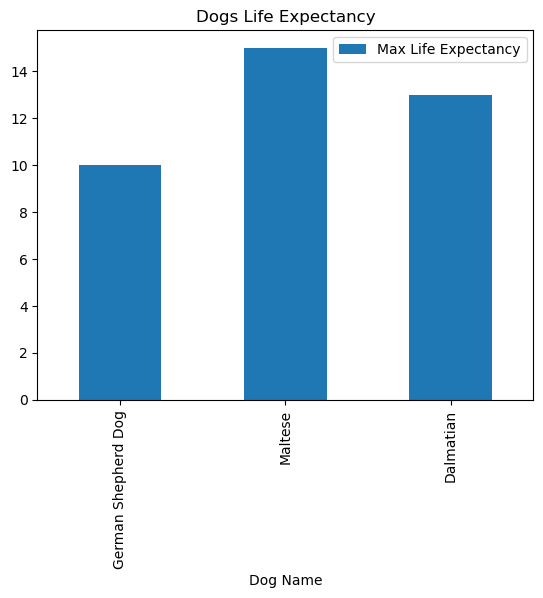

In [41]:
# charting the dog life expectancy

dog_max_life_expectancy_df = dogs_df[["Dog Name", "Max Life Expectancy"]]

dog_max_life_expectancy_df = dog_max_life_expectancy_df.set_index("Dog Name")

dog_max_life_expectancy_df

dog_max_life_expectancy_df.plot(kind="bar")

plt.title("Dogs Life Expectancy")
plt.show()

In [ ]:
# dogs with the best life expectancy

In [ ]:
# dogs with the worst life expectancy

In [ ]:
# plot of all dogs and their life expectancy

In [ ]:
# compare life expectancy vs dog height

In [ ]:
# compare life expectancy vs dog weight

In [ ]:
# calculate linear regression for dogs height and weight

In [2]:
#create starter df for the loop

dog_df = pd.DataFrame({'name': ["start"],
                     'image_link': ["https://"],
                      'barking': 0,
                      'coat_length': 0,
                      'drooling': 0,
                      'energy': 0,
                      'good_with_children': 0,
                      'good_with_other_dogs': 0,
                      'good_with_strangers': 0,
                      'grooming': 0,
                      'max_height_female': 0.0,
                      'max_height_male': 0.0,
                      'max_life_expectancy': 0.0,
                      'max_weight_female': 0.0,
                      'max_weight_male': 0.0,
                      'min_height_female': 0.0,
                      'min_height_male': 0.0,
                      'min_life_expectancy': 0.0,
                      'min_weight_female': 0.0,
                      'min_weight_male': 0.0,
                      'playfulness': 0,
                      'protectiveness': 0,
                      'shedding': 0,
                      'trainability': 0
                    })
dog_df

,name,image_link,barking,coat_length,drooling,energy,good_with_children,good_with_other_dogs,good_with_strangers,grooming,...,max_weight_male,min_height_female,min_height_male,min_life_expectancy,min_weight_female,min_weight_male,playfulness,protectiveness,shedding,trainability
0,start,https://,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [230]:
#
# 
# skip this cell unless testing code for one dog
#
#



# dog_list = ['Golden Retriever']

# list_num = (-1) 
# dog_data = []
# dog_dict = {}

# for i in dog_list:
#     list_num += 1
#     name = dog_list[list_num]
#     url = 'https://api.api-ninjas.com/v1/dogs?name={}'.format(name)
#     response = requests.get(url, headers={'X-Api-Key': 'hQXpxGFZ4I6Mcf7vlloE0g==tXNBsn8nEzWEzrgp'})   
#     dogs_json = response.json()
    
#     if len(dogs_json) == 1:
    
#         dogs = dogs_json[0]

#         # create referencable dict
#         dog_dict.append(dogs)

#         # set df variables from json 
#         dog_name = dogs['name']
#         image_link = dogs['image_link']
#         barking = dogs['barking']
#         coat_length = dogs['coat_length']
#         drooling = dogs['drooling']
#         energy = dogs['energy']
#         good_with_children = dogs['good_with_children']
#         good_with_other_dogs = dogs['good_with_other_dogs']
#         good_with_strangers = dogs['good_with_strangers']
#         grooming = dogs['grooming']
#         max_height_female = dogs['max_height_female']
#         max_height_male = dogs['max_height_male']
#         max_life_expectancy = dogs['max_life_expectancy']
#         max_weight_female = dogs['max_weight_female']
#         max_weight_male = dogs['max_weight_male']
#         min_height_female = dogs['min_height_female']
#         min_height_male = dogs['min_height_male']
#         min_life_expectancy = dogs['min_life_expectancy']
#         min_weight_female = dogs['min_weight_female']
#         min_weight_male = dogs['min_weight_male']
#         playfulness = dogs['playfulness']
#         protectiveness = dogs['protectiveness']
#         shedding = dogs['shedding']
#         trainability = dogs['trainability']

#         # create pandas df

#         dog_df_loop = pd.DataFrame({'name': [dog_name],
#                          'image_link': [image_link],
#                           'barking': [barking],
#                           'coat_length': [coat_length],
#                           'drooling': [drooling],
#                           'energy': [energy],
#                           'good_with_children': [good_with_children],
#                           'good_with_other_dogs': [good_with_other_dogs],
#                           'good_with_strangers': [good_with_strangers],
#                           'grooming': [grooming],
#                           'max_height_female': [max_height_female],
#                           'max_height_male': [max_height_male],
#                           'max_life_expectancy': [max_life_expectancy],
#                           'max_weight_female': [max_weight_female],
#                           'max_weight_male': [max_weight_male],
#                           'min_height_female': [min_height_female],
#                           'min_height_male': [min_height_male],
#                           'min_life_expectancy': [min_height_male],
#                           'min_weight_female': [min_weight_female],
#                           'min_weight_male': [min_weight_male],
#                           'playfulness': [playfulness],
#                           'protectiveness': [protectiveness],
#                           'shedding': [shedding],
#                           'trainability': [trainability]
#                         })
#         dog_df = pd.concat([dog_df, dog_df_loop])
        
#     else:
#         1+1

# dog_df

,name,image_link,barking,coat_length,drooling,energy,good_with_children,good_with_other_dogs,good_with_strangers,grooming,...,max_weight_male,min_height_female,min_height_male,min_life_expectancy,min_weight_female,min_weight_male,playfulness,protectiveness,shedding,trainability
0,start,https://,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
0,Poodle (Miniature),https://api-ninjas.com/images/dogs/poodle_(min...,4,1,1,4,5,3,5,4,...,15.0,10.0,10.0,10.0,10.0,10.0,5,3,1,5
0,Golden Retriever,https://api-ninjas.com/images/dogs/golden_retr...,1,1,2,3,5,5,5,2,...,75.0,23.0,23.0,23.0,55.0,65.0,4,3,4,5
0,Golden Retriever,https://api-ninjas.com/images/dogs/golden_retr...,1,1,2,3,5,5,5,2,...,75.0,23.0,23.0,23.0,55.0,65.0,4,3,4,5


In [3]:
dog_list = ['Affenpinscher', 'Afghan Hound', 'Airedale Terrier', 'Akita', 'Alaskan Malamute', 'American Bulldog',
            'American English Coonhound', 'American Eskimo Dog', 'American Foxhound', 'American Hairless Terrier',
            'American Leopard Hound', 'American Staffordshire Terrier', 'American Water Spaniel',
            'Anatolian Shepherd Dog', 'Appenzeller Sennenhund', 'Australian Cattle Dog', 'Australian Kelpie', 
            'Australian Shepherd', 'Australian Stumpy Tail Cattle Dog', 'Australian Terrier', 'Azawakh', 'Barbet', 
            'Basenji', 'Basset Fauve de Bretagne', 'Basset Hound', 'Bavarian Mountain Scent Hound', 'Beagle', 
            'Bearded Collie', 'Beauceron', 'Bedlington Terrier', 'Belgian Laekenois', 'Belgian Malinois', 
            'Belgian Sheepdog', 'Belgian Tervuren', 'Bergamasco Sheepdog', 'Berger Picard', 'Bernese Mountain Dog', 
            'Bichon Frise', 'Biewer Terrier', 'Black and Tan Coonhound', 'Black Russian Terrier', 'Bloodhound', 
            'Bluetick Coonhound', 'Boerboel', 'Bohemian Shepherd', 'Bolognese', 'Border Collie', 'Border Terrier', 
            'Borzoi', 'Boston Terrier', 'Bouvier des Flandres', 'Boxer', 'Boykin Spaniel', 'Bracco Italiano', 
            'Braque du Bourbonnais', 'Braque Francais Pyrenean', 'Briard', 'Brittany', 'Broholmer', 'Brussels Griffon', 
            'Bull Terrier', 'Bulldog', 'Bullmastiff', 'Cairn Terrier', 'Canaan Dog', 'Cane Corso', 
            'Cardigan Welsh Corgi', 'Carolina Dog', 'Catahoula Leopard Dog', 'Caucasian Shepherd Dog', 
            'Cavalier King Charles Spaniel', 'Central Asian Shepherd Dog', 'Cesky Terrier', 
            'Chesapeake Bay Retriever', 'Chihuahua', 'Chinese Crested', 'Chinese Shar-Pei', 'Chinook', 
            'Chow Chow', 'Cirneco dell’Etna', 'Clumber Spaniel', 'Cocker Spaniel', 'Collie', 'Coton de Tulear', 
            'Croatian Sheepdog', 'Curly-Coated Retriever', 'Czechoslovakian Vlcak', 'Dachshund', 'Dalmatian', 
            'Dandie Dinmont Terrier', 'Danish-Swedish Farmdog', 'Deutscher Wachtelhund', 'Doberman Pinscher', 
            'Dogo Argentino', 'Dogue de Bordeaux', 'Drentsche Patrijshond', 'Drever', 'Dutch Shepherd', 
            'English Cocker Spaniel', 'English Foxhound', 'English Setter', 'English Springer Spaniel', 
            'English Toy Spaniel', 'Entlebucher Mountain Dog', 'Estrela Mountain Dog', 'Eurasier', 'Field Spaniel', 
            'Finnish Lapphund', 'Finnish Spitz', 'Flat-Coated Retriever', 'French Bulldog', 'French Spaniel', 
            'German Longhaired Pointer', 'German Pinscher', 'German Shepherd Dog', 'German Shorthaired Pointer', 
            'German Spitz', 'German Wirehaired Pointer', 'Giant Schnauzer', 'Glen of Imaal Terrier', 'Golden Retriever',
            'Gordon Setter', 'Grand Basset Griffon Vendeen', 'Great Dane', 'Great Pyrenees', 
            'Greater Swiss Mountain Dog', 'Greyhound', 'Hamiltonstovare', 'Hanoverian Scenthound', 
            'Harrier', 'Havanese', 'Hokkaido', 'Hovawart', 'Ibizan Hound', 'Icelandic Sheepdog', 
            'Irish Red and White Setter', 'Irish Setter', 'Irish Terrier', 'Irish Water Spaniel', 'Irish Wolfhound', 
            'Italian Greyhound', 'Jagdterrier', 'Japanese Chin', 'Japanese Spitz', 'Jindo', 'Kai Ken', 
            'Karelian Bear Dog', 'Keeshond', 'Kerry Blue Terrier', 'Kishu Ken', 'Komondor', 'Kromfohrlander', 
            'Kuvasz', 'Labrador Retriever', 'Lagotto Romagnolo', 'Lakeland Terrier', 'Lancashire Heeler', 
            'Lapponian Herder', 'Leonberger', 'Lhasa Apso', 'Lowchen', 'Maltese', 'Manchester Terrier (Standard)', 
            'Manchester Terrier (Toy)', 'Mastiff', 'Miniature American Shepherd', 'Miniature Bull Terrier', 
            'Miniature Pinscher', 'Miniature Schnauzer', 'Mountain Cur', 'Mudi', 'Neapolitan Mastiff', 
            'Nederlandse Kooikerhondje', 'Newfoundland', 'Norfolk Terrier', 'Norrbottenspets', 'Norwegian Buhund', 
            'Norwegian Elkhound', 'Norwegian Lundehund', 'Norwich Terrier', 'Nova Scotia Duck Tolling Retriever', 
            'Old English Sheepdog', 'Otterhound', 'Papillon', 'Parson Russell Terrier', 'Pekingese', 
            'Pembroke Welsh Corgi', 'Perro de Presa Canario', 'Peruvian Inca Orchid', 'Petit Basset Griffon Vendeen',
            'Pharaoh Hound', 'Plott Hound', 'Pointer', 'Polish Lowland Sheepdog', 'Pomeranian', 
            'Poodle (Miniature)', 'Poodle (Standard)', 'Poodle (Toy)', 'Porcelaine', 'Portuguese Podengo', 
            'Portuguese Podengo Pequeno', 'Portuguese Pointer', 'Portuguese Sheepdog', 'Portuguese Water Dog', 
            'Pudelpointer', 'Pug', 'Puli', 'Pumi', 'Pyrenean Mastiff', 'Pyrenean Shepherd', 'Rafeiro do Alentejo', 
            'Rat Terrier', 'Redbone Coonhound', 'Rhodesian Ridgeback', 'Romanian Mioritic Shepherd Dog', 
            'Rottweiler', 'Russell Terrier', 'Russian Toy', 'Russian Tsvetnaya Bolonka', 'Saint Bernard', 
            'Saluki', 'Samoyed', 'Schapendoes', 'Schipperke', 'Scottish Deerhound', 'Scottish Terrier', 
            'Sealyham Terrier', 'Segugio Italiano', 'Shetland Sheepdog', 'Shiba Inu', 'Shih Tzu', 'Shikoku', 
            'Siberian Husky', 'Silky Terrier', 'Skye Terrier', 'Sloughi', 'Slovakian Wirehaired Pointer', 
            'Slovensky Cuvac', 'Slovensky Kopov', 'Small Munsterlander Pointer', 'Smooth Fox Terrier', 
            'Soft Coated Wheaten Terrier', 'Spanish Mastiff', 'Spanish Water Dog', 'Spinone Italiano', 
            'Stabyhoun', 'Staffordshire Bull Terrier', 'Standard Schnauzer', 'Sussex Spaniel', 'Swedish Lapphund', 
            'Swedish Vallhund', 'Taiwan Dog', 'Teddy Roosevelt Terrier', 'Thai Ridgeback', 'Tibetan Mastiff', 
            'Tibetan Spaniel', 'Tibetan Terrier', 'Tornjak', 'Tosa', 'Toy Fox Terrier', 'Transylvanian Hound', 
            'Treeing Tennessee Brindle', 'Treeing Walker Coonhound', 'Vizsla', 'Weimaraner', 
            'Welsh Springer Spaniel', 'Welsh Terrier', 'West Highland White Terrier', 'Wetterhoun', 'Whippet', 
            'Wire Fox Terrier', 'Wirehaired Pointing Griffon', 'Wirehaired Vizsla', 'Working Kelpie', 
            'Xoloitzcuintli', 'Yakutian Laika', 'Yorkshire Terrier']

In [4]:
list_num = (-1) 
dog_data = []
dog_dict = {}

for i in dog_list:
    list_num += 1
    name = dog_list[list_num]
    url = 'https://api.api-ninjas.com/v1/dogs?name={}'.format(name)
    response = requests.get(url, headers={'X-Api-Key': 'hQXpxGFZ4I6Mcf7vlloE0g==tXNBsn8nEzWEzrgp'})   
    dogs_json = response.json()
    
    if len(dogs_json) == 1:
    
        dogs = dogs_json[0]

        # create referencable dict
        dog_dict.append(dogs)

        # set df variables from json 
        dog_name = dogs['name']
        image_link = dogs['image_link']
        barking = dogs['barking']
        coat_length = dogs['coat_length']
        drooling = dogs['drooling']
        energy = dogs['energy']
        good_with_children = dogs['good_with_children']
        good_with_other_dogs = dogs['good_with_other_dogs']
        good_with_strangers = dogs['good_with_strangers']
        grooming = dogs['grooming']
        max_height_female = dogs['max_height_female']
        max_height_male = dogs['max_height_male']
        max_life_expectancy = dogs['max_life_expectancy']
        max_weight_female = dogs['max_weight_female']
        max_weight_male = dogs['max_weight_male']
        min_height_female = dogs['min_height_female']
        min_height_male = dogs['min_height_male']
        min_life_expectancy = dogs['min_life_expectancy']
        min_weight_female = dogs['min_weight_female']
        min_weight_male = dogs['min_weight_male']
        playfulness = dogs['playfulness']
        protectiveness = dogs['protectiveness']
        shedding = dogs['shedding']
        trainability = dogs['trainability']

        # create pandas df

        dog_df_loop = pd.DataFrame({'name': [dog_name],
                         'image_link': [image_link],
                          'barking': [barking],
                          'coat_length': [coat_length],
                          'drooling': [drooling],
                          'energy': [energy],
                          'good_with_children': [good_with_children],
                          'good_with_other_dogs': [good_with_other_dogs],
                          'good_with_strangers': [good_with_strangers],
                          'grooming': [grooming],
                          'max_height_female': [max_height_female],
                          'max_height_male': [max_height_male],
                          'max_life_expectancy': [max_life_expectancy],
                          'max_weight_female': [max_weight_female],
                          'max_weight_male': [max_weight_male],
                          'min_height_female': [min_height_female],
                          'min_height_male': [min_height_male],
                          'min_life_expectancy': [min_height_male],
                          'min_weight_female': [min_weight_female],
                          'min_weight_male': [min_weight_male],
                          'playfulness': [playfulness],
                          'protectiveness': [protectiveness],
                          'shedding': [shedding],
                          'trainability': [trainability]
                        })
        dog_df = pd.concat([dog_df, dog_df_loop])
        
    else:
        1+1

AttributeError: 'dict' object has no attribute 'append'

In [241]:
dog_df = dog_df.reset_index(drop=False)
dog_df = dog_df.drop([0])

dog_df

,index,name,image_link,barking,coat_length,drooling,energy,good_with_children,good_with_other_dogs,good_with_strangers,...,max_weight_male,min_height_female,min_height_male,min_life_expectancy,min_weight_female,min_weight_male,playfulness,protectiveness,shedding,trainability
1,0,Affenpinscher,https://api-ninjas.com/images/dogs/affenpinsch...,3,2,1,3,3,3,5,...,10.0,9.0,9.0,9.0,7.0,7.0,3,3,3,3
2,0,Afghan Hound,https://api-ninjas.com/images/dogs/afghan_houn...,3,1,1,4,3,3,3,...,60.0,25.0,25.0,25.0,50.0,50.0,3,3,1,1
3,0,Airedale Terrier,https://api-ninjas.com/images/dogs/airedale_te...,3,2,1,3,3,3,3,...,70.0,23.0,23.0,23.0,50.0,50.0,3,5,1,3
4,0,Alaskan Malamute,https://api-ninjas.com/images/dogs/alaskan_mal...,3,1,1,4,3,3,3,...,85.0,25.0,25.0,25.0,75.0,85.0,3,4,3,5
5,0,American Bulldog,https://api-ninjas.com/images/dogs/american_bu...,1,1,0,0,3,3,0,...,100.0,20.0,20.0,20.0,60.0,75.0,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,Wirehaired Vizsla,https://api-ninjas.com/images/dogs/wirehaired_...,3,1,2,5,5,3,5,...,65.0,23.0,23.0,23.0,45.0,55.0,5,3,3,5
258,0,Working Kelpie,https://api-ninjas.com/images/dogs/working_kel...,3,1,2,5,5,3,5,...,60.0,19.0,19.0,19.0,28.0,28.0,5,4,3,5
259,0,Xoloitzcuintli,https://api-ninjas.com/images/dogs/xoloitzcuin...,3,1,1,4,3,3,3,...,60.0,19.0,19.0,19.0,28.0,28.0,4,3,1,4
260,0,Yakutian Laika,https://api-ninjas.com/images/dogs/yakutian_la...,4,1,3,5,5,4,1,...,55.0,21.0,21.0,21.0,40.0,40.0,4,5,4,3
